In [105]:
import pandas as pd
import matplotlib.pyplot as plt

import simulation as sim
import visualization as vis

In [2]:
# run simulation
data_list = sim.run_full_simulation()

In [3]:
COLUMN_NAMES = ["Mouse Name","Behavior Preference","Behavior Taken","Food Acquired"]

In [4]:
def create_df_list(list3d, column_names=COLUMN_NAMES):
    """get 3d list and make list of dataframes"""
    df_list = [pd.DataFrame(data, columns=column_names).set_index("Mouse Name") for data in list3d]
    return df_list

In [5]:
def create_behaviorcount_per_cycle(df_list):
    """return df_behaviorcount, has count of behaviors per each cycle"""
    temp_list = []
    for idx, df in enumerate(df_list):
        df = df.groupby('Behavior Taken', sort=False).count().rename(columns={"Behavior Preference":idx+1})[idx+1]
        temp_list.append(df)
    
    return pd.concat(temp_list,axis=1)

In [91]:
def visualize_stackplot(df, ylegend_order=[], title="Behavior Count", supplementary_text=f"Food : {sim.NUM_FOOD} \nSwimPen : -{sim.WATER_PENALTY} \nCarryCap : {sim.NUM_FOOD_MOVEDBY_MOUSE}"):
    """draw stackplot with matplotlib"""
    # set default column order <<postponed>>
    if not ylegend_order:
        ylegend_order = df.index

    # draw stackplot
    fig = plt.figure(figsize=(5,4))
    ax = fig.add_subplot()
    
    ax.text(22,106,supplementary_text, fontsize=20)
    plt.stackplot(df.columns, df)
    plt.legend(df.index, loc='upper left')
    plt.margins(0,0)
    plt.suptitle(title, fontsize=15)
    plt.xlabel("# of cycles", fontsize=12)
    plt.ylabel("# of mice", fontsize=12)
    plt.show()

In [13]:
df_list = create_df_list(data_list)

In [14]:
df_behaviorcount = create_behaviorcount_per_cycle(df_list)
# df_behaviorcount = df_behaviorcount.divide(df_behaviorcount.sum(axis=1), axis=0)
# df_behaviorcount

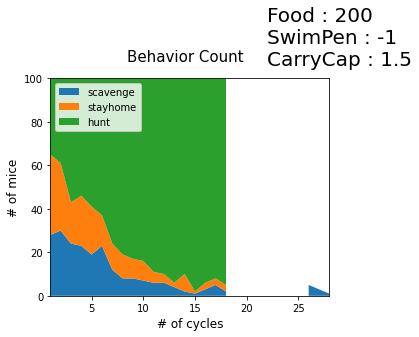

In [92]:
visualize_stackplot(df_behaviorcount)

In [103]:
df_list[5]["Behavior Preference"].iloc[0]

{'hunt': 86.32086935094424,
 'scavenge': 4.514699492685308,
 'stayhome': 9.164431156370457}

In [85]:
df_list = create_df_list(data_list)
test_df = df_list[2]
test_df2 = df_list[1]
test_df
test_df.index

Index(['mouse1', 'mouse2', 'mouse3', 'mouse4', 'mouse5', 'mouse6', 'mouse7',
       'mouse8', 'mouse9', 'mouse10', 'mouse11', 'mouse12', 'mouse13',
       'mouse14', 'mouse15', 'mouse16', 'mouse17', 'mouse18', 'mouse19',
       'mouse20', 'mouse21', 'mouse22', 'mouse23', 'mouse24', 'mouse25',
       'mouse26', 'mouse27', 'mouse28', 'mouse29', 'mouse30', 'mouse31',
       'mouse32', 'mouse33', 'mouse34', 'mouse35', 'mouse36', 'mouse37',
       'mouse38', 'mouse39', 'mouse40', 'mouse41', 'mouse42', 'mouse43',
       'mouse44', 'mouse45', 'mouse46', 'mouse47', 'mouse48', 'mouse49',
       'mouse50', 'mouse51', 'mouse52', 'mouse53', 'mouse54', 'mouse55',
       'mouse56', 'mouse57', 'mouse58', 'mouse59', 'mouse60', 'mouse61',
       'mouse62', 'mouse63', 'mouse64', 'mouse65', 'mouse66', 'mouse67',
       'mouse68', 'mouse69', 'mouse70', 'mouse71', 'mouse72', 'mouse73',
       'mouse74', 'mouse75', 'mouse76', 'mouse77', 'mouse78', 'mouse79',
       'mouse80', 'mouse81', 'mouse82', 'mouse83'

In [67]:
gbdf1=test_df.groupby('Behavior Taken', sort=False).count().rename(columns={"Behavior Preference":"Mouse Count"})["Mouse Count"]
gbdf2=test_df2.groupby('Behavior Taken', sort=False).count().rename(columns={"Behavior Preference":"Mouse Count"})["Mouse Count"]
pd.concat([gbdf1,gbdf2], axis=1)


Behavior Taken
hunt        47
scavenge    24
stayhome    29
Name: Mouse Count, dtype: int64

In [39]:
# gb_df = test_df.groupby(["Behavior Taken"], sort=False).count()
gb_df = test_df.groupby('Behavior Taken', sort=False).agg(Mouse_Count=('Behavior Preference','count'), Food_Acquired=('Food Acquired','first'))
gb_df2 = test_df2.groupby(["Behavior Taken"], sort=False).count()
gb_df

,Mouse_Count,Food_Acquired
Behavior Taken,,
hunt,47,3.489362
scavenge,24,0.679245
stayhome,29,0.679245
